In [ ]:
import numpy as np 
import pandas as pd 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving colon - labled-1 C.csv to colon - labled-1 C.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['colon - labled-1 C.csv']))
print(df)

    Unnamed: 0     H55933     R39465    R39465_     R85482     U14973  \
0            1  8589.4160  5468.2407  4263.4077  4064.9358  1997.8930   
1            2  9164.2540  6719.5293  4883.4487  3718.1590  2015.2214   
2            3  3825.7050  6970.3613  5369.9688  4705.6500  1166.5536   
3            4  6246.4487  7823.5340  5955.8350  3975.5642  2002.6132   
4            5  3230.3286  3694.4500  3400.7400  3463.5857  2181.4202   
..         ...        ...        ...        ...        ...        ...   
57          58  4972.1660  4173.9180  3668.5337  1567.5554  1570.4406   
58          59  9112.3720  6824.4863  5982.8460  3147.0430  4847.3080   
59          60  6730.6250  3472.1250  2559.4624  2624.6892  1596.2179   
60          61  6234.6226  4005.3000  3093.6750  3183.0857  1795.3107   
61          62  7472.0100  3653.9340  2728.2163  3494.4805  2404.6655   

        R02593     T51496     H80240     T65938  ...     R70790     L11706  \
0    5282.3250  2169.7200  2773.4211  7526.38

In [ ]:
from sklearn.model_selection import train_test_split
y = df.Class
X = df.drop('Class', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
print("\nX_train:\n")
print(X_train.head())
print(X_train.shape)

print("\nX_test:\n")
print(X_test.head())
print(X_test.shape)


X_train:

    Unnamed: 0     H55933      R39465    R39465_     R85482     U14973  \
59          60  6730.6250   3472.1250  2559.4624  2624.6892  1596.2179   
41          42  6194.2450   5202.0000  4079.6338  3951.1982  2382.2214   
6            7  7126.5986   3779.0680  3705.5537  6594.5140  2460.9048   
31          32  5012.0200   1383.4886  1269.6487  3168.7124  1945.4929   
36          37  5466.9300  10152.2730  7760.9175  7258.2500  1469.6906   

       R02593     T51496     H80240     T65938  ...     X67699     R70790  \
59  4372.7890  3798.5261  1026.4775  3512.3337  ...  254.86548  119.96250   
41  1949.1643  1909.0975  3415.1038  3965.9700  ...  214.36070  103.07875   
6   3775.6821  2621.4187  2047.2812  6411.2676  ...  147.80476   51.03250   
31  2726.8037  3300.5938  1672.8600  4185.6226  ...  107.97976   96.21375   
36  5695.6465  4662.8550  2949.1812  6223.8600  ...  247.62262  303.73750   

       L11706     T90549     D17390     M33210     H18490     H40891  \
59  111.6

In [ ]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [ ]:
print(X_train)

[[6.0000000e+01 6.7306250e+03 3.4721250e+03 ... 1.3352126e+02
  9.3098750e+01 7.4325000e+00]
 [4.2000000e+01 6.1942450e+03 5.2020000e+03 ... 1.1340875e+02
  7.6417500e+01 4.3768750e+01]
 [7.0000000e+00 7.1265986e+03 3.7790680e+03 ... 5.2961250e+01
  3.7236250e+01 2.4445000e+01]
 ...
 [2.0000000e+00 9.1642540e+03 6.7195293e+03 ... 1.8656750e+02
  4.4472500e+01 1.6773750e+01]
 [1.2000000e+01 1.4173054e+04 8.4118610e+03 ... 2.0543875e+02
  5.8243750e+01 4.4057500e+01]
 [9.0000000e+00 9.3306790e+03 7.0172295e+03 ... 1.2244125e+02
  4.0391250e+01 2.6847500e+01]]


In [ ]:
trainX = X_train[:,1:].reshape(X_train.shape[0],1,40, 50).astype('float32')
X_train = trainX/255.0

testX = X_test[:,1:].reshape(X_test.shape[0],1, 40, 50).astype('float32')
X_test = testX/255.0

In [ ]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
num_classes = 10
epochs = 20
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu', input_shape=(1, 40, 50),data_format='channels_first'),
    MaxPooling2D(pool_size=2) ,
    Dropout(0.2),
    Flatten(),
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')
])

In [ ]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = cnn_model.fit(
    X_train,
    y_train,
    batch_size=4096,
    epochs=75,
    verbose=1,
    validation_data=(X_test,y_test),
)

Epoch 1/75
1/1 [==============================] - 9s 9s/step - loss: 4.1062 - accuracy: 0.0000e+00 - val_loss: 0.8458 - val_accuracy: 0.6923
Epoch 2/75
1/1 [==============================] - 0s 29ms/step - loss: 0.9905 - accuracy: 0.6327 - val_loss: 2.1203 - val_accuracy: 0.3077
Epoch 3/75
1/1 [==============================] - 0s 30ms/step - loss: 1.5802 - accuracy: 0.3673 - val_loss: 0.4551 - val_accuracy: 0.6923
Epoch 4/75
1/1 [==============================] - 0s 29ms/step - loss: 0.5253 - accuracy: 0.6531 - val_loss: 0.6912 - val_accuracy: 0.6923
Epoch 5/75
1/1 [==============================] - 0s 25ms/step - loss: 0.8215 - accuracy: 0.6327 - val_loss: 0.4685 - val_accuracy: 0.6923
Epoch 6/75
1/1 [==============================] - 0s 30ms/step - loss: 0.5808 - accuracy: 0.6939 - val_loss: 0.4357 - val_accuracy: 0.9231
Epoch 7/75
1/1 [==============================] - 0s 30ms/step - loss: 0.3571 - accuracy: 0.8776 - val_loss: 0.9122 - val_accuracy: 0.6923
Epoch 8/75
1/1 [=========

Text(0.5, 1.0, 'Train - Accuracy')

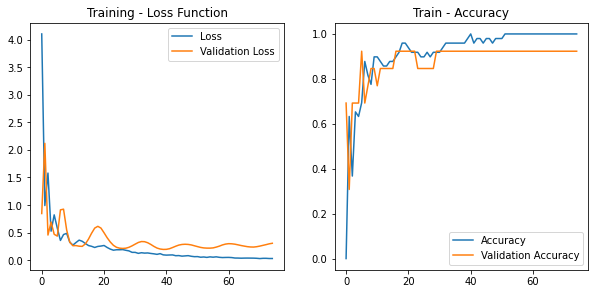

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

#Other lines of code.

In [ ]:
'''solutions = []

for x in range(1, 2000 + 1):
    for y in range(1, 2000 + 1):
        if x * y == 2000:
            solutions.append((x, y))

print(solutions)'''

[(1, 2000), (2, 1000), (4, 500), (5, 400), (8, 250), (10, 200), (16, 125), (20, 100), (25, 80), (40, 50), (50, 40), (80, 25), (100, 20), (125, 16), (200, 10), (250, 8), (400, 5), (500, 4), (1000, 2), (2000, 1)]
